# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.shape

(7752, 25)

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Data Cleaning

In [7]:
#checking for all the null values in the columns
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Above observation shows that some features/columns are having null values in the dataset.

# Expolatory Data Analysis (EDA)

In [8]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Observations shows that some columns are float type and rest are object type.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [11]:
df_n = df.copy()
df_n['station'].fillna(df_n['station'].value_counts().idxmax(), inplace=True)
df_n['Date'].fillna(df_n['Date'].value_counts().idxmax(), inplace=True)
df_n['Present_Tmax'].fillna(df_n['Present_Tmax'].mean(skipna=True), inplace=True)
df_n['Present_Tmin'].fillna(df_n['Present_Tmin'].mean(skipna=True), inplace=True)
df_n['LDAPS_RHmin'].fillna(df_n['LDAPS_RHmin'].mean(skipna=True), inplace=True)
df_n['LDAPS_RHmax'].fillna(df_n['LDAPS_RHmax'].mean(skipna=True), inplace=True)
df_n['LDAPS_Tmax_lapse'].fillna(df_n['LDAPS_Tmax_lapse'].mean(skipna=True), inplace=True)
df_n['LDAPS_Tmin_lapse'].fillna(df_n['LDAPS_Tmin_lapse'].mean(skipna=True), inplace=True)
df_n['LDAPS_WS'].fillna(df_n['LDAPS_WS'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_LH'].fillna(df_n['LDAPS_LH'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_CC1'].fillna(df_n['LDAPS_CC1'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_CC2'].fillna(df_n['LDAPS_CC2'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_CC3'].fillna(df_n['LDAPS_CC3'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_CC4'].fillna(df_n['LDAPS_CC4'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_PPT1'].fillna(df_n['LDAPS_PPT1'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_PPT2'].fillna(df_n['LDAPS_PPT2'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_PPT3'].fillna(df_n['LDAPS_PPT3'].value_counts().mean(skipna=True), inplace=True)
df_n['LDAPS_PPT4'].fillna(df_n['LDAPS_PPT4'].value_counts().mean(skipna=True), inplace=True)
df_n['Next_Tmax'].fillna(df_n['Next_Tmax'].mean(skipna=True), inplace=True)
df_n['Next_Tmin'].fillna(df_n['Next_Tmin'].mean(skipna=True), inplace=True)


In [12]:
df_n

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,30-06-2013,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [13]:
# Checking missing values now;

df_n.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
# Drop the non-relevant columns;

df_n=df_n.drop(['Date'],axis=1)

In [15]:
df_n

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [16]:
# Checking the datatypes now;

df_n.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Correlation

In [17]:
# Checking the Correlation with respect to target variable(Next_Tmax):-

df_n.corr()['Next_Tmax'].sort_values()

LDAPS_CC3          -0.464961
LDAPS_CC2          -0.446747
LDAPS_RHmin        -0.437898
LDAPS_CC1          -0.411439
LDAPS_CC4          -0.397451
LDAPS_WS           -0.362493
LDAPS_RHmax        -0.283738
DEM                -0.172538
LDAPS_PPT2         -0.159395
LDAPS_PPT3         -0.158679
LDAPS_PPT4         -0.135778
LDAPS_PPT1         -0.105144
Slope              -0.102725
lat                -0.053510
lon                 0.003052
Solar radiation     0.008795
station             0.108236
LDAPS_LH            0.133807
Present_Tmin        0.471806
LDAPS_Tmin_lapse    0.586983
Present_Tmax        0.610348
Next_Tmin           0.621427
LDAPS_Tmax_lapse    0.827189
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

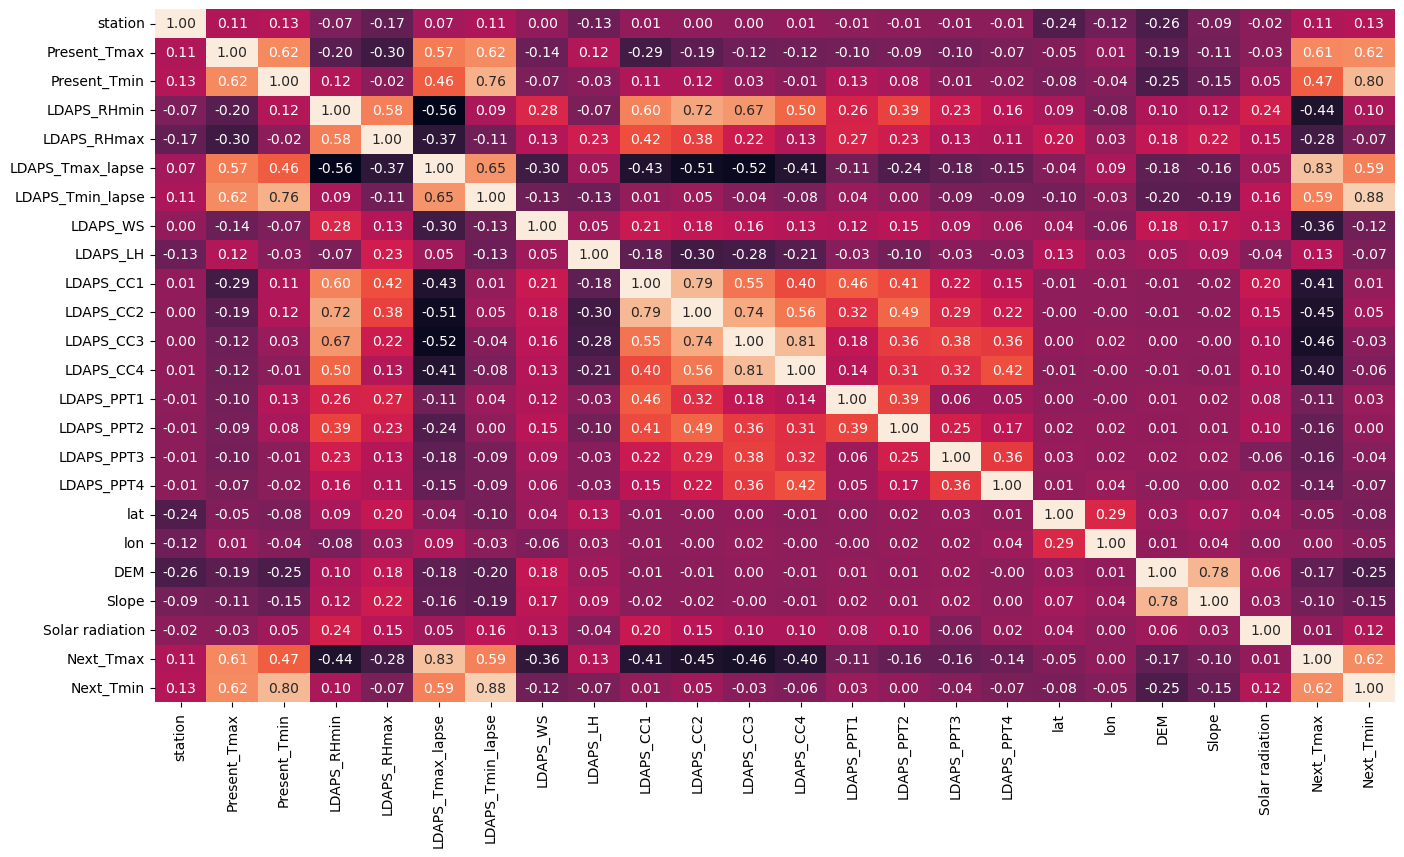

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(df_n.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

Above correlation shows that 'lat','lon' and 'Solar radiation ' are less correlated with the target variable.

In [19]:
df_n.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [20]:
# Drop the less correlated/non-relevant columns;

df_n=df_n.drop(['lat','lon','Solar radiation'],axis=1)
df_n

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,212.3350,2.785000,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,44.7624,0.514100,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,33.3068,0.266100,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,45.7160,2.534800,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,35.0380,0.505500,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.5876,0.155400,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.2956,0.222300,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,19.5844,0.271300,27.8,17.4
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.3700,0.098475,17.4,11.3


In [21]:
df_n.shape

(7752, 21)

# Checking for the skewness

In [22]:
df_n.skew()

station             0.000100
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.302901
LDAPS_LH            0.638092
LDAPS_CC1           0.486283
LDAPS_CC2           0.506795
LDAPS_CC3           0.684174
LDAPS_CC4           0.716004
LDAPS_PPT1          5.281587
LDAPS_PPT2          5.588665
LDAPS_PPT3          5.964639
LDAPS_PPT4          6.144201
DEM                 1.723257
Slope               1.563020
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

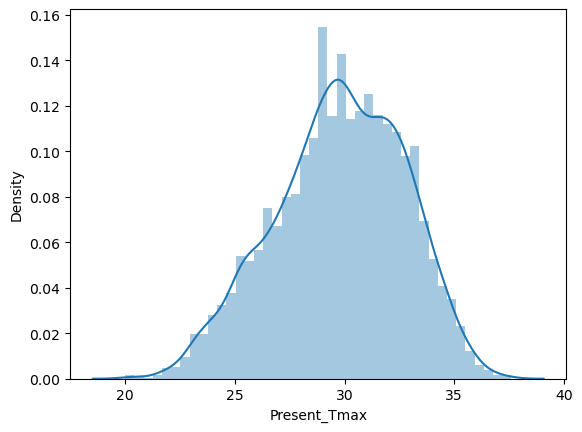

In [23]:
sns.distplot(df_n['Present_Tmax'])
plt.show()

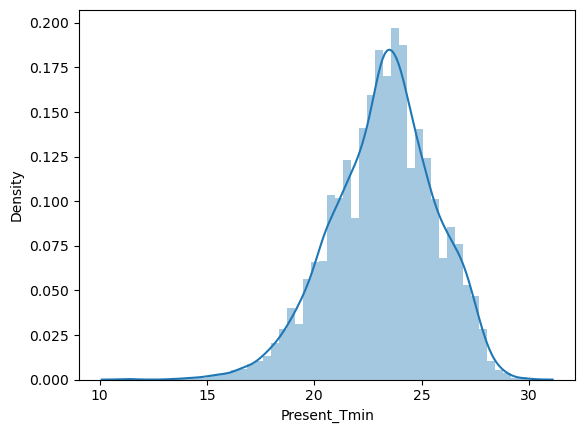

In [24]:
sns.distplot(df_n['Present_Tmin'])
plt.show()

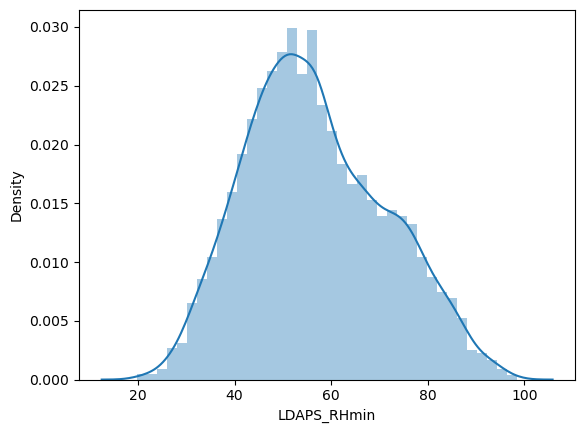

In [25]:
sns.distplot(df_n['LDAPS_RHmin'])
plt.show()

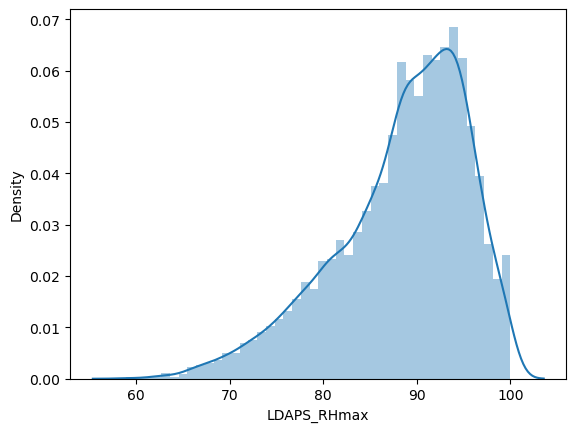

In [26]:
sns.distplot(df_n['LDAPS_RHmax'])
plt.show()

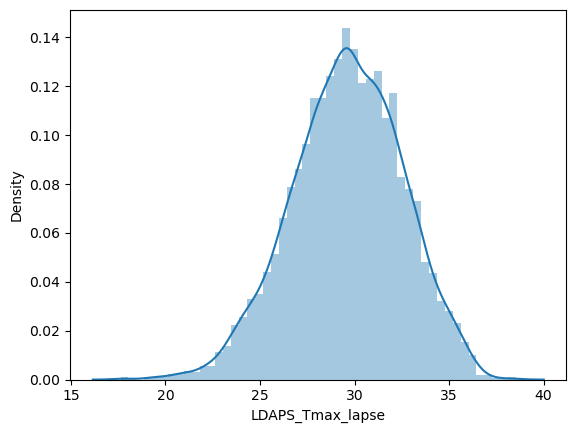

In [27]:
sns.distplot(df_n['LDAPS_Tmax_lapse'])
plt.show()

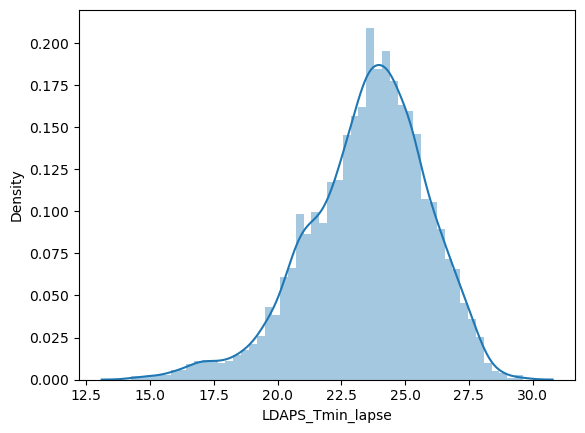

In [28]:
sns.distplot(df_n['LDAPS_Tmin_lapse'])
plt.show()

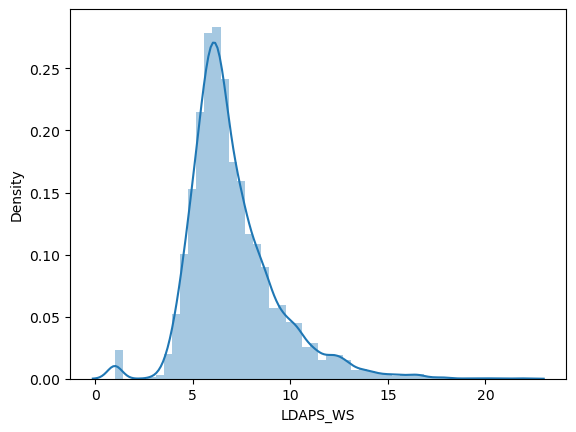

In [29]:
sns.distplot(df_n['LDAPS_WS'])
plt.show()

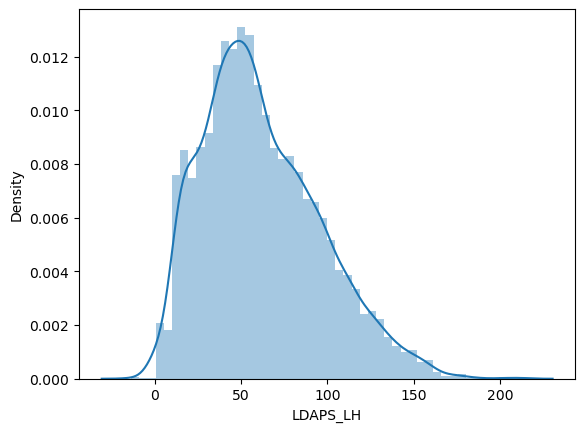

In [30]:
sns.distplot(df_n['LDAPS_LH'])
plt.show()

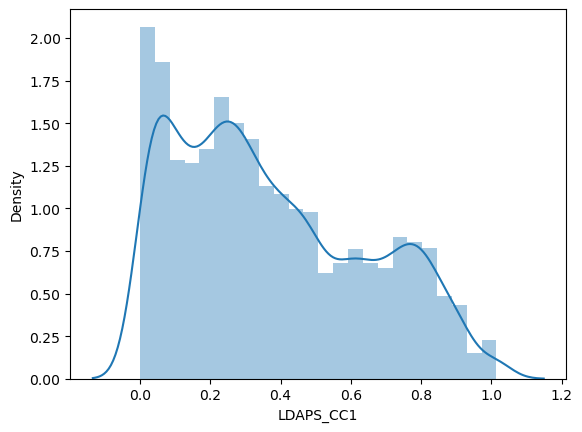

In [31]:
sns.distplot(df_n['LDAPS_CC1'])
plt.show()

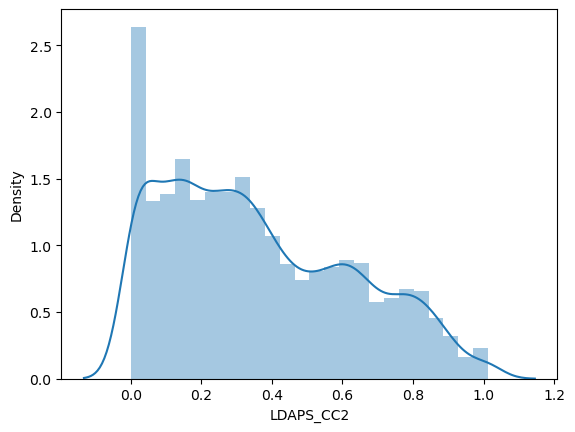

In [32]:
sns.distplot(df_n['LDAPS_CC2'])
plt.show()

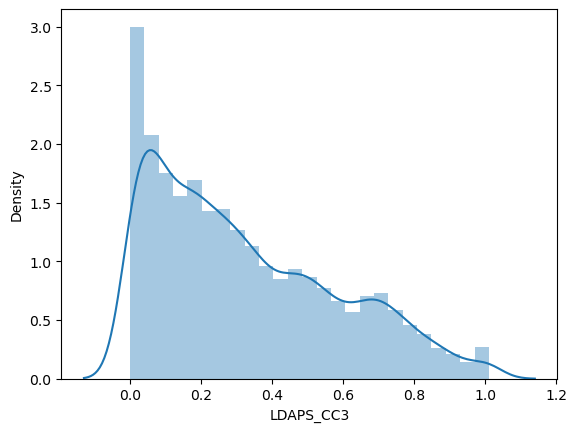

In [33]:
sns.distplot(df_n['LDAPS_CC3'])
plt.show()

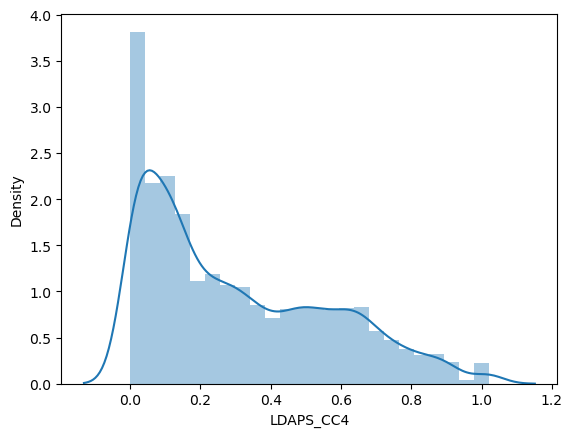

In [34]:
sns.distplot(df_n['LDAPS_CC4'])
plt.show()

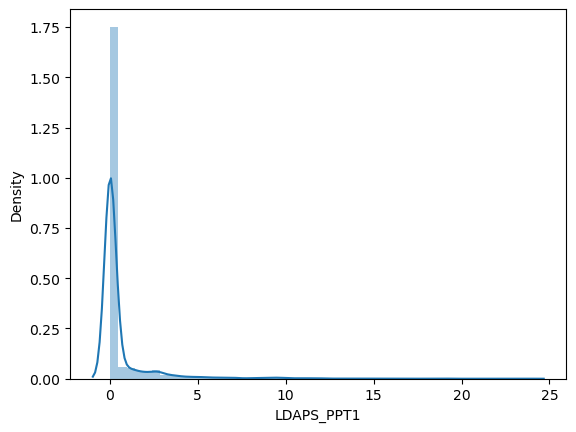

In [35]:
sns.distplot(df_n['LDAPS_PPT1'])
plt.show()

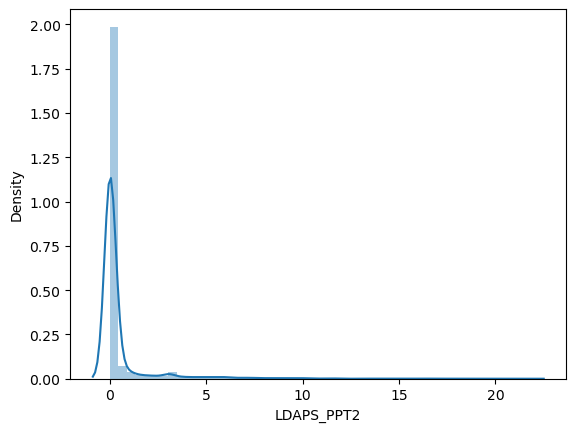

In [36]:
sns.distplot(df_n['LDAPS_PPT2'])
plt.show()

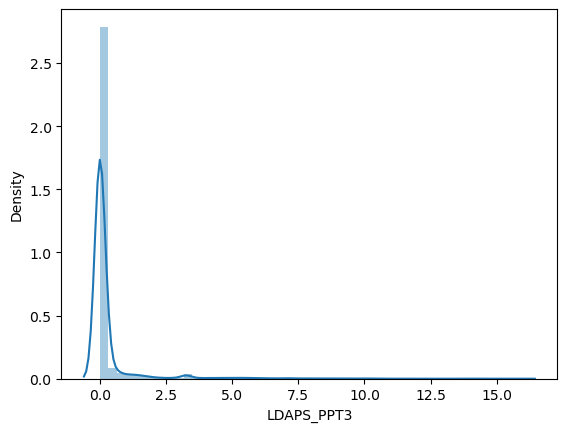

In [37]:
sns.distplot(df_n['LDAPS_PPT3'])
plt.show()

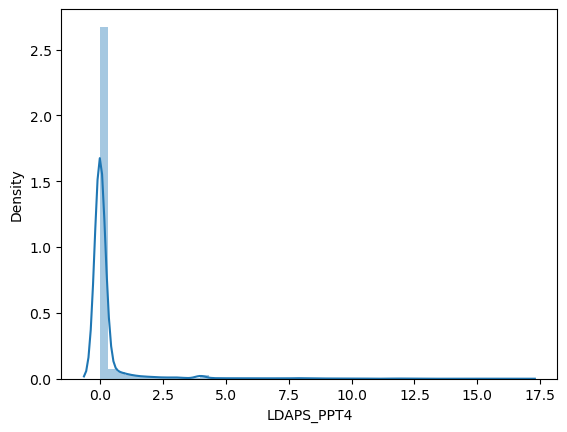

In [38]:
sns.distplot(df_n['LDAPS_PPT4'])
plt.show()

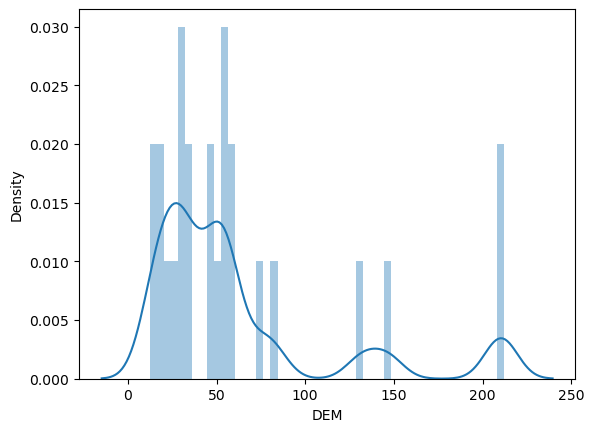

In [39]:
sns.distplot(df_n['DEM'])
plt.show()

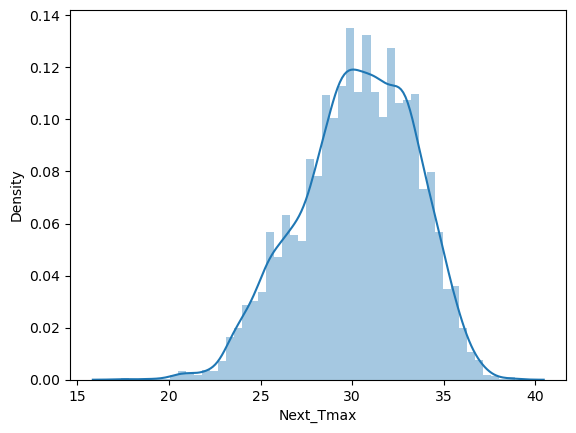

In [40]:
sns.distplot(df_n['Next_Tmax'])
plt.show()

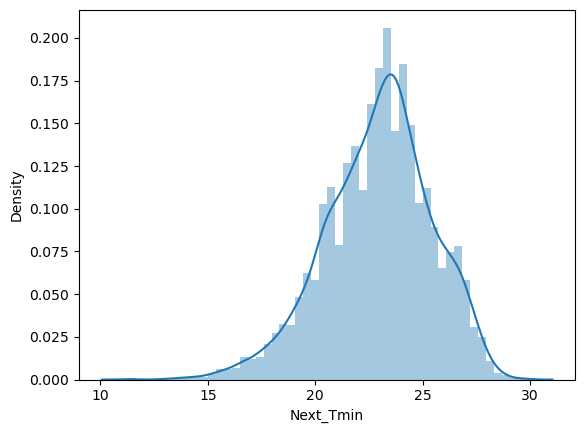

In [41]:
sns.distplot(df_n['Next_Tmin'])
plt.show()

In [42]:
# Drop the less correlated/non-relevant columns;

df_n=df_n.drop(['station'],axis=1)
df_n

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,212.3350,2.785000,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,44.7624,0.514100,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,33.3068,0.266100,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,45.7160,2.534800,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,35.0380,0.505500,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.5876,0.155400,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.2956,0.222300,28.6,18.8
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,19.5844,0.271300,27.8,17.4
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.3700,0.098475,17.4,11.3


# Outliers Removal

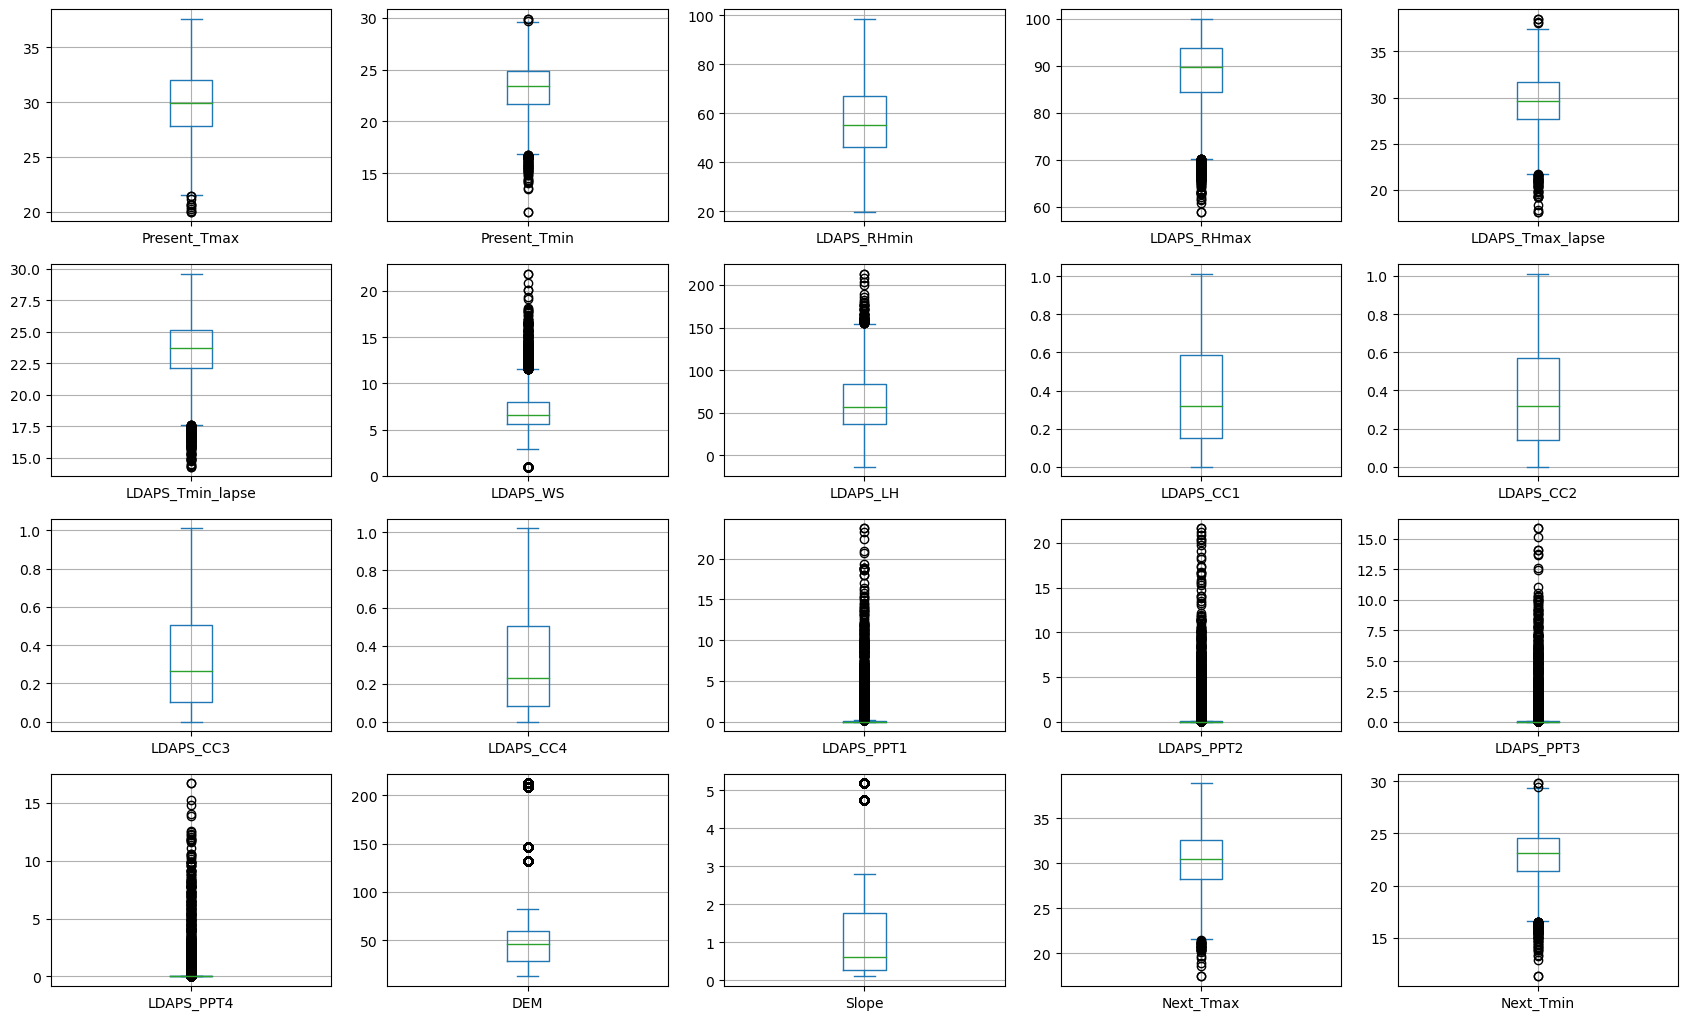

In [43]:
df_n.plot(kind='box',subplots=True,layout=(5,5),figsize=(21,16),grid=True)
plt.show()

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df_n))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,0.361326,0.759529,0.102515,0.383078,0.524889,0.216663,0.097620,0.221165,0.525010,0.598903,0.632913,0.666929,0.314601,0.287732,0.257506,0.243509,2.772243,1.115004,0.376282,0.697599
1,0.721084,0.676296,0.308027,0.311586,0.080895,0.223848,0.597711,0.292445,0.556417,0.418043,0.641639,0.679111,0.314601,0.287732,0.257506,0.243509,0.315157,0.542158,0.072097,0.174064
2,0.619608,0.031188,0.552814,0.614982,0.162936,0.451210,0.399656,1.212209,0.616575,0.396517,0.468703,0.624315,0.314601,0.287732,0.257506,0.243509,0.526218,0.723133,0.264260,0.389744
3,0.754909,0.072805,0.101426,1.133054,0.031092,0.079874,0.616277,0.111939,0.590418,0.515390,0.635003,0.654292,0.314601,0.287732,0.257506,0.243509,0.297588,0.932424,0.456422,0.550832
4,0.551957,0.551446,0.040098,0.248765,0.170325,0.011187,0.578580,1.350584,0.832192,0.424752,0.566308,0.518150,0.314601,0.287732,0.257506,0.243509,0.494322,0.548433,0.296287,0.174064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,2.187892,2.549048,2.056591,1.328126,1.112066,2.029679,0.394911,0.297601,1.283892,1.063036,1.259227,1.165216,0.314601,0.287732,0.257506,0.243509,0.852681,0.803915,0.632499,1.946031
7748,2.187892,2.299348,2.241619,1.548184,0.887662,2.047744,0.220122,0.430155,1.262159,1.085977,1.259227,1.165216,0.314601,0.287732,0.257506,0.243509,0.821213,0.755095,0.536418,1.664127
7749,2.221718,2.424198,2.317504,1.555342,0.570780,2.137962,0.111105,1.548950,1.213482,1.142997,1.259227,1.162186,0.314601,0.287732,0.257506,0.243509,0.779043,0.719338,0.792634,2.227935
7750,3.304127,4.962817,2.532517,4.113443,4.087857,3.959146,1.844310,2.214432,1.395667,1.369163,1.259227,1.165216,0.314601,0.287732,0.257506,0.243509,0.911963,0.845455,4.123453,4.684525


In [45]:
# index no.

np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))

In [46]:
df_new=df_n[(z<3).all(axis=1)]
df_new

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,26.2980,0.5721,27.6,17.7
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,21.9668,0.1332,28.0,17.1
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,15.5876,0.1554,28.3,18.1
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,17.2956,0.2223,28.6,18.8


In [47]:
df_n.shape

(7752, 20)

In [48]:
df_new.shape

(6917, 20)

In [49]:
# percentage data loss:-

loss_percent=(7752-6917)/(7752*100)
print(loss_percent,'%')


0.001077141382868937 %


In [50]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(df_n,method='yeo-johnson')
X

array([[-0.40889726, -0.79770658,  0.17267978, ...,  1.31415303,
        -0.43686105, -0.74529314],
       [ 0.70512271, -0.72013038, -0.24176973, ..., -0.38533562,
         0.0104505 , -0.24085488],
       [ 0.59569241, -0.02767423, -0.50145939, ..., -0.94916364,
         0.20995623,  0.34237906],
       ...,
       [-2.04992031, -2.18006638, -2.80370744, ..., -0.93504362,
        -0.82960761, -2.01944984],
       [-2.84618687, -3.68800537, -3.16812   , ..., -1.47726373,
        -3.21833024, -3.46891694],
       [ 2.9810374 ,  3.23307848,  2.48954996, ...,  1.74216318,
         3.24001855,  3.26846173]])

In [51]:
X.ndim

2

In [52]:
X.std()

1.0

In [53]:
x=df_n.drop(['Next_Tmax','Next_Tmin'],axis=1)
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,212.3350,2.785000
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,44.7624,0.514100
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,33.3068,0.266100
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,45.7160,2.534800
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,35.0380,0.505500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.5876,0.155400
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.2956,0.222300
7749,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,19.5844,0.271300
7750,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.3700,0.098475


In [54]:
# Separate features (X) and targets (y_min for minimum temp, y_max for maximum temp)
y_min = df_n['Next_Tmin']
y_max = df_n['Next_Tmax']

In [55]:
y_min

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64

In [56]:
y_max

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64

# Machine Learning Algorithms Training and Testing of AveragePrice

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_min_train)  # Train model for minimum temperature
    y_min_pred = model.predict(X_test)  # Predict minimum temperature
    min_temp_rmse = mean_squared_error(y_min_test, y_min_pred, squared=False)  # Calculate RMSE
    print(f"{name} - Minimum Temperature RMSE: {min_temp_rmse:.2f}")
    
    model.fit(X_train, y_max_train)  # Train model for maximum temperature
    y_max_pred = model.predict(X_test)  # Predict maximum temperature
    max_temp_rmse = mean_squared_error(y_max_test, y_max_pred, squared=False)  # Calculate RMSE
    print(f"{name} - Maximum Temperature RMSE: {max_temp_rmse:.2f}")
    print()


Training Linear Regression...
Linear Regression - Minimum Temperature RMSE: 0.22
Linear Regression - Maximum Temperature RMSE: 0.24

Training Decision Tree...
Decision Tree - Minimum Temperature RMSE: 0.03
Decision Tree - Maximum Temperature RMSE: 0.06

Training Random Forest...
Random Forest - Minimum Temperature RMSE: 0.02
Random Forest - Maximum Temperature RMSE: 0.04

Training Gradient Boosting...
Gradient Boosting - Minimum Temperature RMSE: 0.02
Gradient Boosting - Maximum Temperature RMSE: 0.03



In [ ]:
# Define hyperparameters grid and scoring metric for each model
param_grid = {
    "Linear Regression": {},
    "Decision Tree": {"max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7, None], "min_samples_split": [2, 5, 10]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]}
}

scoring_metric = 'neg_mean_squared_error'  # Scoring metric for GridSearchCV

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring=scoring_metric)
    grid_search.fit(X_train, y_min_train if name != 'Random Forest' else y_min_train.ravel())  # Reshape for Random Forest
    best_params = grid_search.best_params_
    print(f"Best hyperparameters for {name}: {best_params}")
    
    # Train model with best hyperparameters
    model.set_params(**best_params)
    model.fit(X_train, y_min_train if name != 'Random Forest' else y_min_train.ravel())  # Reshape for Random Forest
    
    # Predict minimum temperature
    y_min_pred = model.predict(X_test)
    
    # Calculate RMSE
    min_temp_rmse = mean_squared_error(y_min_test, y_min_pred, squared=False)
    print(f"{name} - Minimum Temperature RMSE: {min_temp_rmse:.2f}")
    print()
    
    # For maximum temperature prediction
    print(f"Tuning hyperparameters for {name} (Maximum Temperature)...")
    grid_search_max = GridSearchCV(model, param_grid[name], cv=5, scoring=scoring_metric)
    grid_search_max.fit(X_train, y_max_train if name != 'Random Forest' else y_max_train.ravel())  # Reshape for Random Forest
    best_params_max = grid_search_max.best_params_
    print(f"Best hyperparameters for {name} (Maximum Temperature): {best_params_max}")
    
    # Train model with best hyperparameters for maximum temperature
    model.set_params(**best_params_max)
    model.fit(X_train, y_max_train if name != 'Random Forest' else y_max_train.ravel())  # Reshape for Random Forest
    
    # Predict maximum temperature
    y_max_pred = model.predict(X_test)
    
    # Calculate RMSE for maximum temperature
    max_temp_rmse = mean_squared_error(y_max_test, y_max_pred, squared=False)
    print(f"{name} - Maximum Temperature RMSE: {max_temp_rmse:.2f}")
    print()


Tuning hyperparameters for Linear Regression...
Best hyperparameters for Linear Regression: {}
Linear Regression - Minimum Temperature RMSE: 0.22

Tuning hyperparameters for Linear Regression (Maximum Temperature)...
Best hyperparameters for Linear Regression (Maximum Temperature): {}
Linear Regression - Maximum Temperature RMSE: 0.24

Tuning hyperparameters for Decision Tree...
Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_split': 5}
Decision Tree - Minimum Temperature RMSE: 0.03

Tuning hyperparameters for Decision Tree (Maximum Temperature)...
Best hyperparameters for Decision Tree (Maximum Temperature): {'max_depth': None, 'min_samples_split': 5}
Decision Tree - Maximum Temperature RMSE: 0.04

Tuning hyperparameters for Random Forest...
